In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta, time

In [2]:
date_time_str = '2 Jun 2027 01:50:50.687'

In [3]:
date = datetime.strptime(date_time_str, '%d %b %Y %H:%M:%S.%f')

In [4]:
date

datetime.datetime(2027, 6, 2, 1, 50, 50, 687000)

In [5]:
area_path = '../dataset/area_timing/'

In [6]:
dfs = []
for path, subdirs, files in os.walk(area_path):
    for name in files:
        csv_path = os.path.join(path, name)
        sat_name = name.split('-To-')[1].replace('.csv', '')
        df = pd.read_csv(csv_path)
        df['Start Time (UTCG)'] = pd.to_datetime(df['Start Time (UTCG)'], format='%d %b %Y %H:%M:%S.%f')
        df['Stop Time (UTCG)'] = pd.to_datetime(df['Stop Time (UTCG)'], format='%d %b %Y %H:%M:%S.%f')
        mask = (df['Start Time (UTCG)'].dt.time >= time(9,00,00)) & (df['Start Time (UTCG)'].dt.time <= time(18,00,00))
        df_working = df.loc[mask]
        sum_time_by_day = df_working.groupby(df_working['Start Time (UTCG)'].dt.date)['Duration (sec)'].sum()
        sum_time_by_day.to_dict()
        final = pd.DataFrame(sum_time_by_day.to_dict(), index=[sat_name,])
        dfs.append(final)

df_final = pd.concat(dfs)

In [7]:
sums_time_of_recording = df_final.sum().to_dict()

In [8]:
df_final

,2027-06-01,2027-06-02,2027-06-03,2027-06-04,2027-06-05,2027-06-06,2027-06-07,2027-06-08,2027-06-09,2027-06-10,2027-06-11,2027-06-12,2027-06-13
KinoSat_110801,1186.506,901.185,672.901,739.999,639.850,857.916,846.164,837.803,1176.108,913.210,671.991,742.301,640.910
KinoSat_110802,747.044,1143.588,836.819,671.606,574.463,645.810,843.849,859.974,758.451,1142.405,819.643,673.172,562.207
KinoSat_110803,863.109,788.453,1089.032,774.769,691.006,585.795,678.649,857.329,863.700,852.990,1085.966,775.417,706.908
KinoSat_110807,573.406,644.680,843.420,859.535,746.730,1143.089,835.065,671.807,561.438,646.870,844.178,860.222,757.545
KinoSat_110806,638.999,857.957,845.934,813.511,1177.490,900.450,672.322,740.517,640.467,857.997,846.205,812.065,1175.153
...,...,...,...,...,...,...,...,...,...,...,...,...,...
KinoSat_111603,1302.700,1320.747,1407.068,1502.790,1551.236,1896.382,1753.161,1536.305,1305.875,1320.799,1377.445,1515.570,1548.941
KinoSat_111602,1327.595,1351.306,1545.548,1543.240,1879.170,1788.897,1549.305,1301.116,1335.141,1343.268,1510.025,1546.319,1894.684
KinoSat_111601,1380.282,1531.331,1507.263,1998.541,1821.531,1625.433,1361.488,1326.313,1360.896,1518.250,1507.903,2001.260,1809.643
KinoSat_111609,1505.161,1849.235,1848.992,1712.171,1548.248,1300.457,1333.701,1492.190,1497.730,1533.159,1933.262,1696.263,1516.974


In [16]:
df_final.sort_values(by=[df_final.columns[0]], ascending=False).head()

,2027-06-01,2027-06-02,2027-06-03,2027-06-04,2027-06-05,2027-06-06,2027-06-07,2027-06-08,2027-06-09,2027-06-10,2027-06-11,2027-06-12,2027-06-13
KinoSat_112004,1.121646,0.942333,0.851193,0.742586,0.754943,0.862278,0.921625,1.116651,1.113355,0.924772,0.830886,0.752690,0.771098
KinoSat_112005,1.108032,1.080105,0.910572,0.799974,0.752012,0.778355,0.876731,1.022020,1.116203,1.003682,0.908816,0.778510,0.752252
KinoSat_112006,1.055576,1.118521,0.998064,0.878531,0.753574,0.751733,0.777932,0.900670,1.071228,1.108598,0.995170,0.859894,0.739591
KinoSat_111908,0.976930,0.884039,0.879412,0.754671,0.751429,0.777673,0.899848,0.943996,0.966857,0.995608,0.860530,0.741906,0.752803
KinoSat_111705,0.967209,0.930704,0.856167,0.747831,0.636994,0.644404,0.795928,0.907600,0.968001,0.901744,0.852948,0.740459,0.637640


In [15]:
for col in df_final.columns:
    df_final[col] = df_final[col].apply(lambda x: x * 4 / 8192)

In [18]:
filtered = df_final[df_final > 0.4725].dropna(how='all')

In [19]:
filtered.describe()

,2027-06-01,2027-06-02,2027-06-03,2027-06-04,2027-06-05,2027-06-06,2027-06-07,2027-06-08,2027-06-09,2027-06-10,2027-06-11,2027-06-12,2027-06-13
count,128.000000,124.000000,126.000000,127.000000,128.000000,123.000000,124.000000,128.000000,129.000000,124.000000,125.000000,129.000000,128.000000
mean,0.694123,0.696498,0.691229,0.693169,0.694873,0.697328,0.694767,0.692225,0.692997,0.694382,0.692766,0.690148,0.694168
std,0.155247,0.153585,0.151757,0.154051,0.153147,0.153128,0.151497,0.155135,0.153488,0.151800,0.152499,0.154817,0.152767
min,0.474124,0.473764,0.472669,0.481120,0.474440,0.473361,0.480633,0.478881,0.473432,0.472864,0.473423,0.477459,0.473860
25%,0.552011,0.558967,0.559526,0.566376,0.569078,0.559473,0.567399,0.563936,0.551748,0.558177,0.565815,0.558696,0.567370
50%,0.673335,0.665048,0.654525,0.669756,0.674040,0.667216,0.657801,0.667892,0.674109,0.666993,0.653038,0.668609,0.669282
75%,0.770323,0.784841,0.772053,0.760879,0.769716,0.785112,0.775190,0.760713,0.766608,0.778528,0.776717,0.767231,0.774628
max,1.121646,1.118521,1.097224,1.114705,1.116463,1.109507,1.100380,1.116651,1.116203,1.108598,1.105206,1.114015,1.119369


In [196]:
for key, value in sums_time_of_recording.items():
    value = value * 4 / 8192
    print(key, value)

2027-06-01 115.76897314453126
2027-06-02 115.05749999999999
2027-06-03 114.87188867187498
2027-06-04 115.27343310546875
2027-06-05 115.85767431640625
2027-06-06 114.93893896484376
2027-06-07 114.852404296875
2027-06-08 115.41647607421874
2027-06-09 115.77595507812501
2027-06-10 114.8487314453125
2027-06-11 114.83084228515627
2027-06-12 115.328658203125
2027-06-13 115.66006005859376


In [84]:
df = pd.read_csv('../dataset/area_timing/orbit_01/Russia-To-KinoSat_110101.csv')

In [22]:
df['Start Time (UTCG)'] = pd.to_datetime(df['Start Time (UTCG)'], format='%d %b %Y %H:%M:%S.%f')
df['Stop Time (UTCG)'] = pd.to_datetime(df['Stop Time (UTCG)'], format='%d %b %Y %H:%M:%S.%f')

In [23]:
df.dtypes

Acces                         int64
Start Time (UTCG)    datetime64[ns]
Stop Time (UTCG)     datetime64[ns]
Duration (sec)              float64
dtype: object

In [24]:
df

,Acces,Start Time (UTCG),Stop Time (UTCG),Duration (sec)
0,1,2027-06-01 00:00:01.000,2027-06-01 00:01:27.766,86.766
1,2,2027-06-01 01:31:20.774,2027-06-01 01:38:40.320,439.545
2,3,2027-06-01 01:38:52.598,2027-06-01 01:39:52.724,60.126
3,4,2027-06-01 03:08:30.346,2027-06-01 03:15:49.225,438.879
4,5,2027-06-01 04:45:33.998,2027-06-01 04:50:18.020,284.021
...,...,...,...,...
215,216,2027-06-13 20:27:17.194,2027-06-13 20:28:52.025,94.830
216,217,2027-06-13 21:46:57.415,2027-06-13 21:48:00.813,63.399
217,218,2027-06-13 21:58:16.132,2027-06-13 21:59:56.787,100.655
218,219,2027-06-13 22:00:55.095,2027-06-13 22:01:22.684,27.588


### Filter working hours

In [38]:
mask = (df['Start Time (UTCG)'].dt.time >= time(9,00,00)) & (df['Start Time (UTCG)'].dt.time <= time(18,00,00))
df_working = df.loc[mask]

### Group by date and calculate sum timing

In [60]:
sum_time_by_day = df_working.groupby(df_working['Start Time (UTCG)'].dt.date)['Duration (sec)'].sum()

In [62]:
sum_time_by_day.to_dict()

{datetime.date(2027, 6, 1): 1571.4479999999999,
 datetime.date(2027, 6, 2): 970.269,
 datetime.date(2027, 6, 3): 909.983,
 datetime.date(2027, 6, 4): 898.873,
 datetime.date(2027, 6, 5): 1026.085,
 datetime.date(2027, 6, 6): 1137.164,
 datetime.date(2027, 6, 7): 1307.3600000000001,
 datetime.date(2027, 6, 8): 1494.3580000000002,
 datetime.date(2027, 6, 9): 1570.014,
 datetime.date(2027, 6, 10): 968.425,
 datetime.date(2027, 6, 11): 909.3689999999999,
 datetime.date(2027, 6, 12): 899.0070000000001,
 datetime.date(2027, 6, 13): 1028.74}

In [66]:
test = pd.DataFrame(sum_time_by_day.to_dict(), index=['KinoSat_110101',])

In [67]:
test

,2027-06-01,2027-06-02,2027-06-03,2027-06-04,2027-06-05,2027-06-06,2027-06-07,2027-06-08,2027-06-09,2027-06-10,2027-06-11,2027-06-12,2027-06-13
KinoSat_110101,1571.448,970.269,909.983,898.873,1026.085,1137.164,1307.36,1494.358,1570.014,968.425,909.369,899.007,1028.74


In [88]:
df_working

,Acces,Start Time (UTCG),Stop Time (UTCG),Duration (sec)
9,10,2027-06-01 09:04:56.438,2027-06-01 09:05:20.158,23.719
10,11,2027-06-01 10:34:25.515,2027-06-01 10:41:45.328,439.813
11,12,2027-06-01 12:11:11.264,2027-06-01 12:16:30.066,318.802
12,13,2027-06-01 12:16:30.412,2027-06-01 12:17:24.111,53.699
13,14,2027-06-01 12:17:28.171,2027-06-01 12:17:44.354,16.183
...,...,...,...,...
218,219,2027-06-12 16:03:05.716,2027-06-12 16:04:04.251,58.535
228,229,2027-06-13 09:47:18.189,2027-06-13 09:54:05.829,407.639
229,230,2027-06-13 11:23:40.254,2027-06-13 11:29:59.862,379.608
230,231,2027-06-13 13:01:10.424,2027-06-13 13:05:35.364,264.939


### Plot visibility time of sattelites of specific orbit by ground station

In [2]:
path_to_facility = '../dataset/facility_timing/facility_Facility-Anadyr1/'

In [109]:
sat_to_fac = pd.read_csv(path_to_facility+"Anadyr1-To-KinoSat_110101"+".csv")

In [110]:
sat_to_fac['sat_name'] = 'KinoSat_110101'

In [111]:
sat_to_fac['Start Time (UTCG)'] = pd.to_datetime(sat_to_fac['Start Time (UTCG)'], format='%d %b %Y %H:%M:%S.%f')
sat_to_fac['Stop Time (UTCG)'] = pd.to_datetime(sat_to_fac['Stop Time (UTCG)'], format='%d %b %Y %H:%M:%S.%f')

In [113]:
sat_to_fac = sat_to_fac[sat_to_fac['Start Time (UTCG)'] > datetime(2027, 6, 2, 9, 0, 0)]

In [114]:
sat_to_fac

,Acces,Start Time (UTCG),Stop Time (UTCG),Duration (sec),sat_name
14,15,2027-06-02 10:00:20.702,2027-06-02 10:11:06.290,645.588,KinoSat_110101
15,16,2027-06-02 11:36:03.737,2027-06-02 11:48:54.431,770.693,KinoSat_110101
16,17,2027-06-02 13:11:59.208,2027-06-02 13:24:27.400,748.192,KinoSat_110101
17,18,2027-06-02 14:47:45.181,2027-06-02 14:58:24.454,639.273,KinoSat_110101
18,19,2027-06-02 16:22:53.452,2027-06-02 16:31:41.854,528.402,KinoSat_110101
...,...,...,...,...,...
139,140,2027-06-13 16:58:36.488,2027-06-13 17:07:08.326,511.838,KinoSat_110101
140,141,2027-06-13 18:32:09.405,2027-06-13 18:41:37.595,568.189,KinoSat_110101
141,142,2027-06-13 20:05:34.419,2027-06-13 20:17:06.588,692.169,KinoSat_110101
142,143,2027-06-13 21:40:07.432,2027-06-13 21:52:59.205,771.773,KinoSat_110101


In [115]:
sat_to_fac = sat_to_fac[sat_to_fac['Start Time (UTCG)'] < datetime(2027, 6, 3, 9, 0, 0)]

In [ ]:
path_to_facility

In [3]:
path_to_facility_2 = '../dataset/facility_timing/facility_Facility-Dehli/'

In [4]:
dfs = []

for filename in os.listdir(path_to_facility):
    f = os.path.join(path_to_facility, filename)
    # checking if it is a file
    if os.path.isfile(f):
        if True:
            sat_to_fac = pd.read_csv(f)
            sat_to_fac['Start Time (UTCG)'] = pd.to_datetime(sat_to_fac['Start Time (UTCG)'], format='%d %b %Y %H:%M:%S.%f')
            sat_to_fac['Stop Time (UTCG)'] = pd.to_datetime(sat_to_fac['Stop Time (UTCG)'], format='%d %b %Y %H:%M:%S.%f')
            sat_to_fac['sat_name'] = filename.split('-To-')[1].replace('.csv', '')
            sat_to_fac = sat_to_fac[sat_to_fac['Start Time (UTCG)'] > datetime(2027, 6, 2, 9, 0, 0)]
            sat_to_fac = sat_to_fac[sat_to_fac['Start Time (UTCG)'] < datetime(2027, 6, 4, 9, 0, 0)]
            dfs.append(sat_to_fac)

df_final = pd.concat(dfs)
df_final = df_final.sort_values(by=['sat_name'])
df = df_final

dfs = []
for filename in os.listdir(path_to_facility_2):
    f = os.path.join(path_to_facility_2, filename)
    # checking if it is a file
    if os.path.isfile(f):
        if True:
            sat_to_fac = pd.read_csv(f)
            sat_to_fac['Start Time (UTCG)'] = pd.to_datetime(sat_to_fac['Start Time (UTCG)'], format='%d %b %Y %H:%M:%S.%f')
            sat_to_fac['Stop Time (UTCG)'] = pd.to_datetime(sat_to_fac['Stop Time (UTCG)'], format='%d %b %Y %H:%M:%S.%f')
            sat_to_fac['sat_name'] = filename.split('-To-')[1].replace('.csv', '')
            sat_to_fac = sat_to_fac[sat_to_fac['Start Time (UTCG)'] > datetime(2027, 6, 2, 9, 0, 0)]
            sat_to_fac = sat_to_fac[sat_to_fac['Start Time (UTCG)'] < datetime(2027, 6, 4, 9, 0, 0)]
            dfs.append(sat_to_fac)

df_final = pd.concat(dfs)
df_final = df_final.sort_values(by=['sat_name'])
df_2 = df_final

In [5]:
df_final = df_final.sort_values(by=['sat_name'])

In [6]:
df

,Acces,Start Time (UTCG),Stop Time (UTCG),Duration (sec),sat_name
32,33,2027-06-03 21:16:01.472,2027-06-03 21:28:41.468,759.996,KinoSat_110101
34,35,2027-06-04 00:30:12.307,2027-06-04 00:40:13.659,601.352,KinoSat_110101
33,34,2027-06-03 22:51:55.002,2027-06-03 23:04:36.552,761.550,KinoSat_110101
14,15,2027-06-02 10:00:20.702,2027-06-02 10:11:06.290,645.588,KinoSat_110101
31,32,2027-06-03 19:41:50.811,2027-06-03 19:52:52.266,661.455,KinoSat_110101
...,...,...,...,...,...
30,31,2027-06-03 20:15:25.956,2027-06-03 20:27:36.215,730.259,KinoSat_112010
31,32,2027-06-03 21:51:19.716,2027-06-03 22:04:13.985,774.269,KinoSat_112010
36,37,2027-06-04 05:44:21.033,2027-06-04 05:56:01.610,700.577,KinoSat_112010
32,33,2027-06-03 23:27:14.542,2027-06-03 23:38:55.612,701.070,KinoSat_112010


In [7]:
df_2

,Acces,Start Time (UTCG),Stop Time (UTCG),Duration (sec),sat_name
12,13,2027-06-03 16:50:26.497,2027-06-03 17:00:06.939,580.442,KinoSat_110101
13,14,2027-06-03 18:24:55.490,2027-06-03 18:37:25.417,749.927,KinoSat_110101
11,12,2027-06-03 06:34:49.564,2027-06-03 06:45:18.481,628.917,KinoSat_110101
14,15,2027-06-04 05:09:55.496,2027-06-04 05:22:30.009,754.513,KinoSat_110101
15,16,2027-06-04 06:47:29.750,2027-06-04 06:56:47.581,557.832,KinoSat_110101
...,...,...,...,...,...
10,11,2027-06-03 04:16:23.075,2027-06-03 04:28:06.638,703.563,KinoSat_112010
9,10,2027-06-03 02:40:51.578,2027-06-03 02:52:16.334,684.756,KinoSat_112010
8,9,2027-06-02 16:27:20.310,2027-06-02 16:35:28.554,488.244,KinoSat_112010
15,16,2027-06-04 04:28:38.489,2027-06-04 04:39:41.333,662.844,KinoSat_112010


AttributeError: 'Axes' object has no attribute 'yticks'

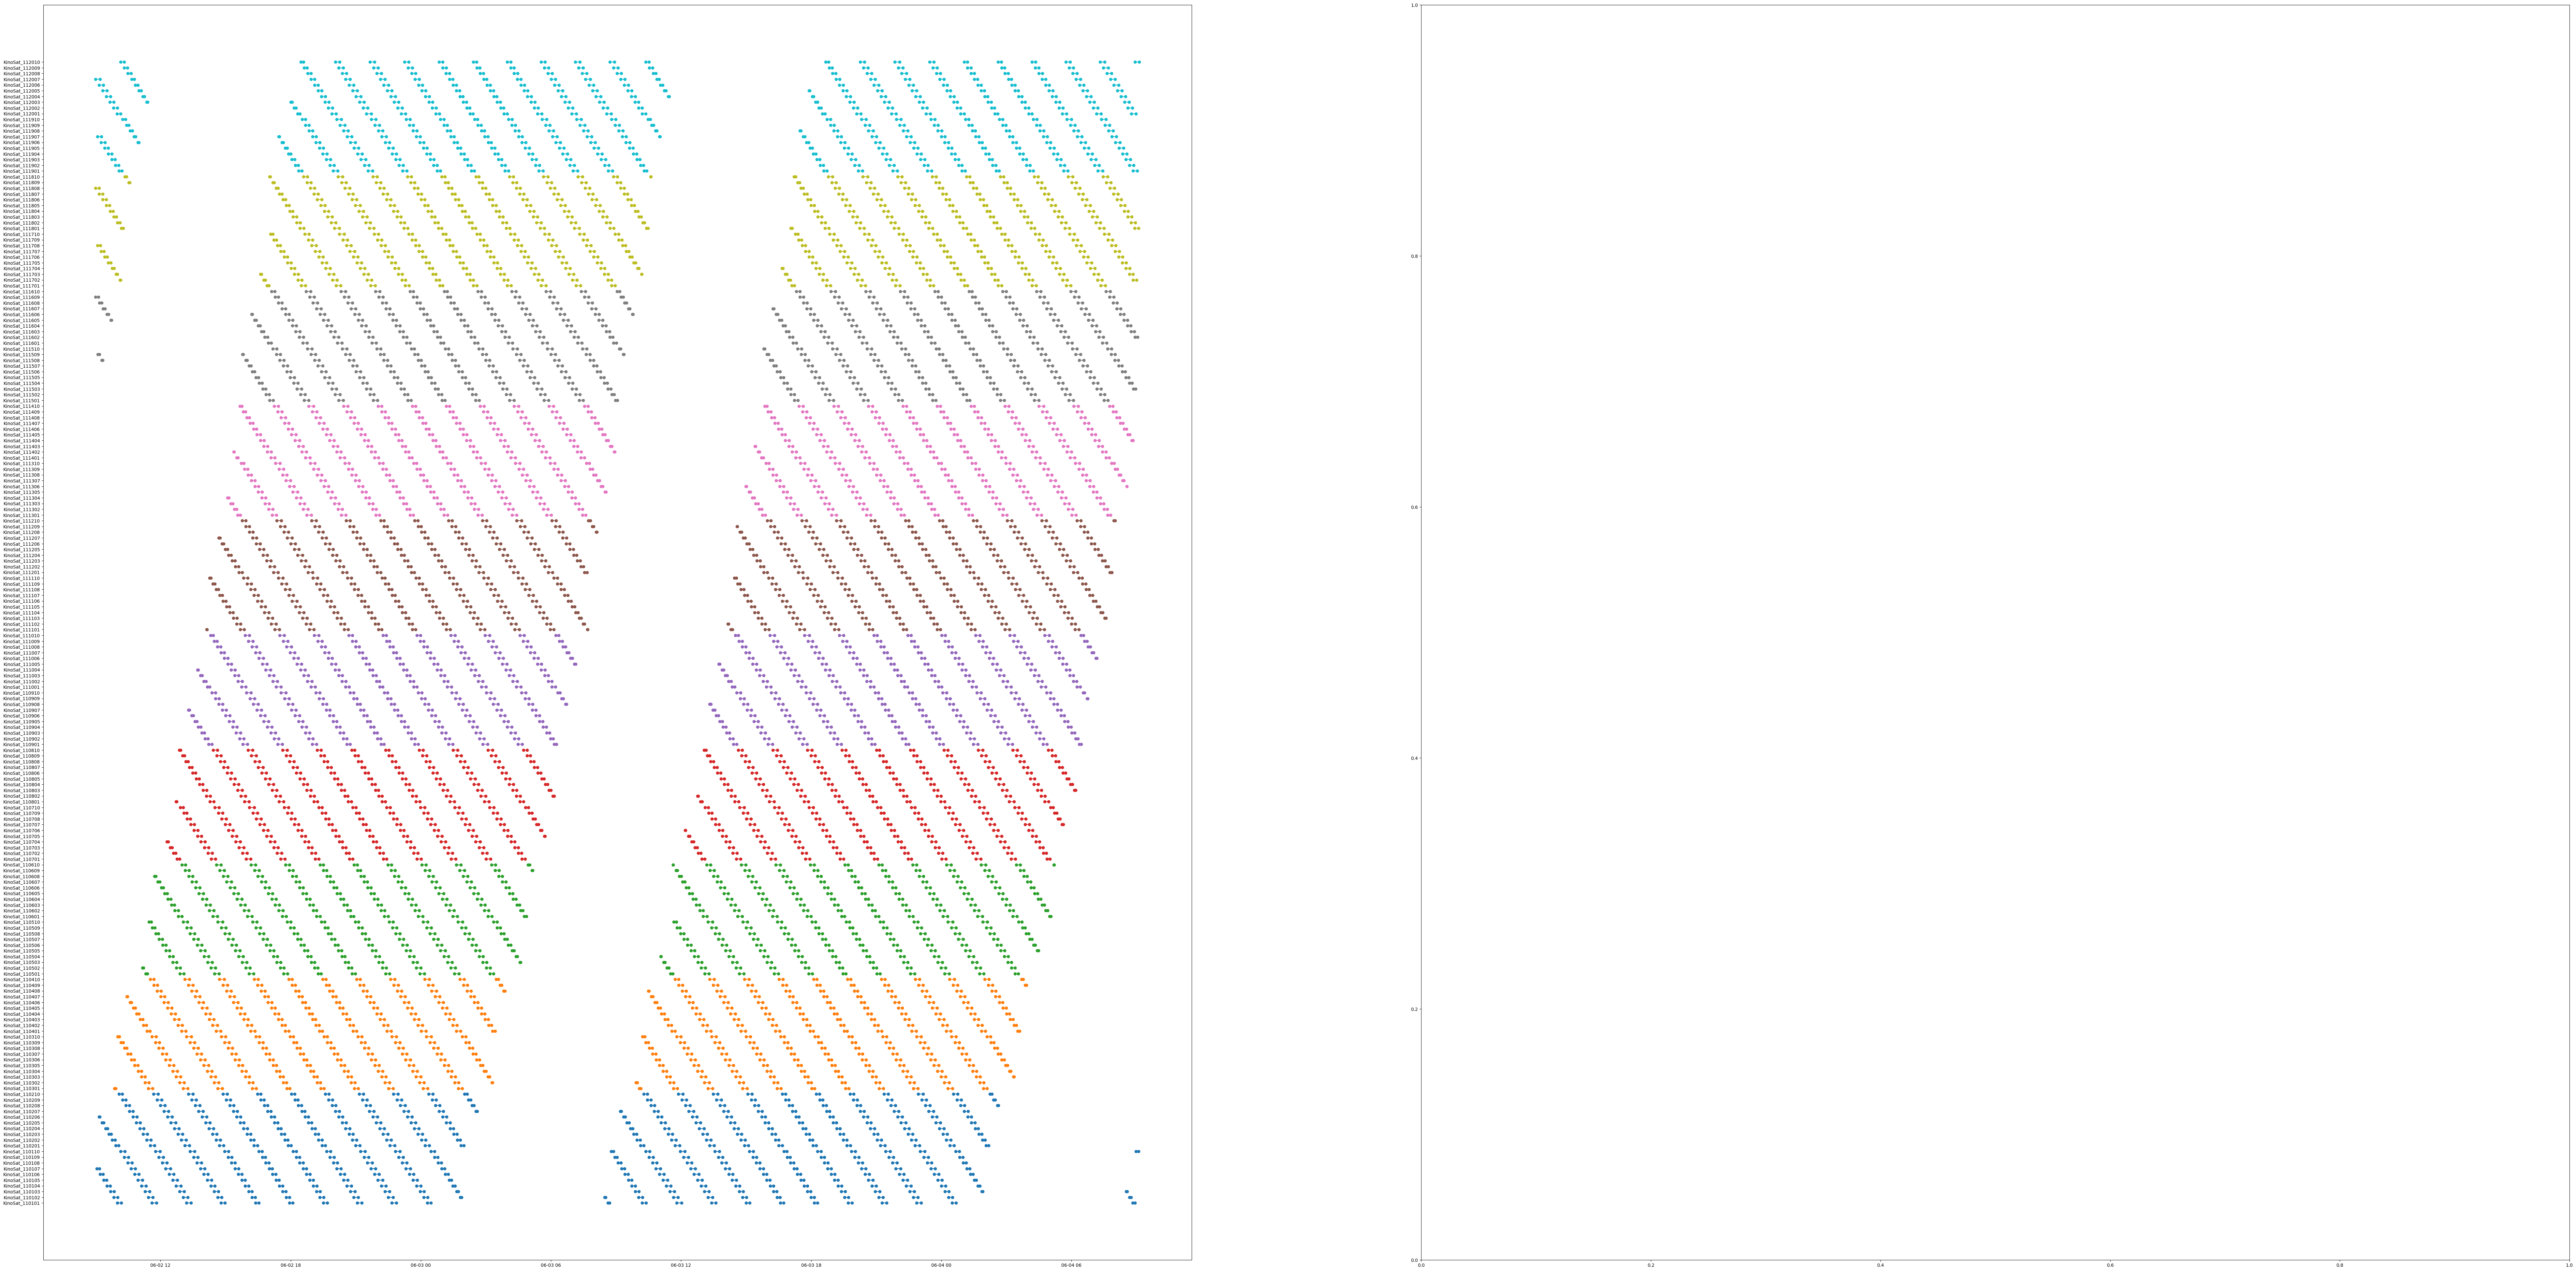

In [160]:

# Set the figure size
plt.figure(figsize=(100, 9))

colors = plt.cm.tab10(np.linspace(0, 1, 10))


# Get unique satellite names
unique_sat_names = df['sat_name'].unique()

# Create a colormap with a unique color for each satellite name
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_sat_names)))

# Plot the time intervals as a line plot with unique colors
for i, row in df.iterrows():
    sat_name = row['sat_name']
    color = colors[np.where(unique_sat_names == sat_name)[0][0]]
    plt.plot([row['Start Time (UTCG)'], row['Stop Time (UTCG)']], [sat_name, sat_name], marker='o', color=color)

# Set the y-axis labels as satellite names
plt.yticks(unique_sat_names)

# Set x-axis and y-axis labels
plt.xlabel('Time')
plt.ylabel('Satellite Name')

# Set the title of the plot
plt.title('Satellite Time Intervals')

# Increase tick rate on x-axis
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=8))

# Increase tick rate on y-axis
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(nbins=len(unique_sat_names)))

# Display the plot
plt.show()

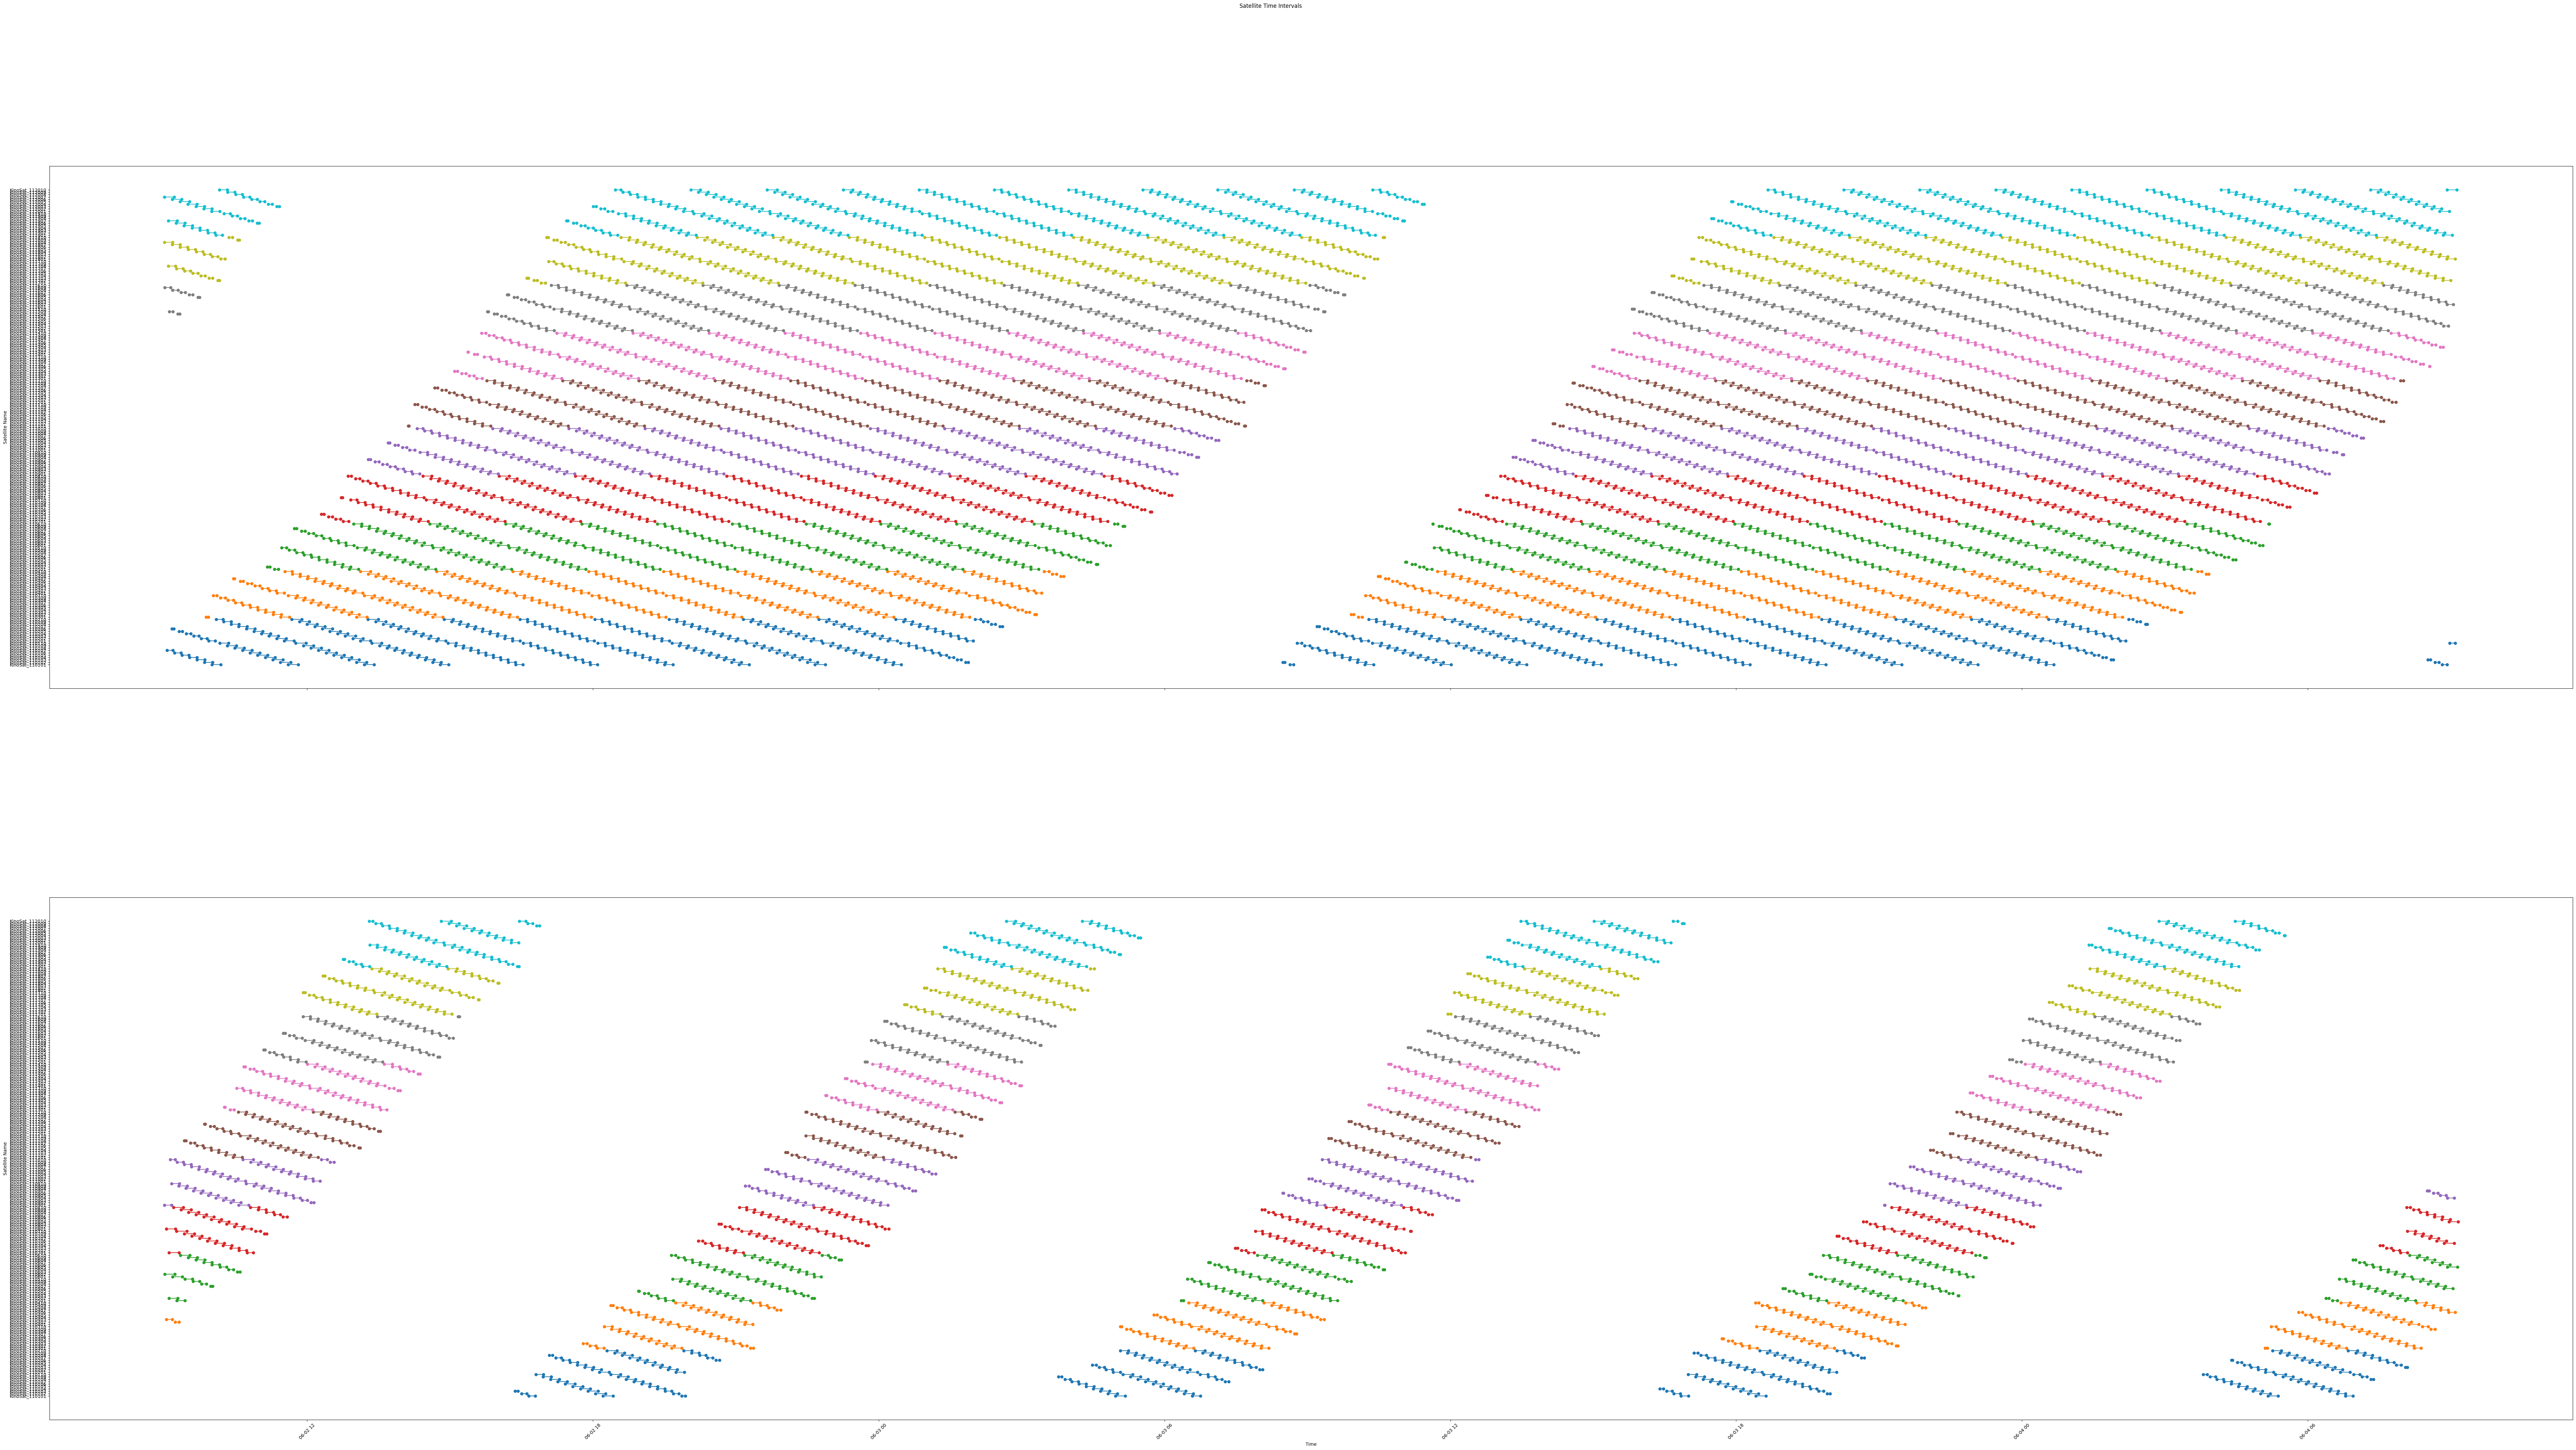

In [8]:
# Set the figure size and create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(100, 50), sharex=True)


unique_sat_names = df['sat_name'].unique()

# Create a colormap with a unique color for each satellite name
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_sat_names)))

# Plot the first dataset
for i, row in df.iterrows():
    sat_name = row['sat_name']
    color = colors[np.where(unique_sat_names == sat_name)[0][0]]
    ax1.plot([row['Start Time (UTCG)'], row['Stop Time (UTCG)']], [row['sat_name'], row['sat_name']], marker='o', color=color)

# Set the y-axis labels for the first subplot
ax1.set_yticks(df['sat_name'].unique())
ax1.set_ylabel('Satellite Name')

# Plot the second dataset
for i, row in df_2.iterrows():
    sat_name = row['sat_name']
    color = colors[np.where(unique_sat_names == sat_name)[0][0]]
    ax2.plot([row['Start Time (UTCG)'], row['Stop Time (UTCG)']], [row['sat_name'], row['sat_name']], marker='o', color=color)

# Set the y-axis labels for the second subplot
ax2.set_yticks(df_2['sat_name'].unique())
ax2.set_ylabel('Satellite Name')

# Set the common x-axis label
plt.xlabel('Time')

# Set the title of the figure
plt.suptitle('Satellite Time Intervals')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Display the figure
plt.show()